<a href="https://colab.research.google.com/github/jgait/DSPS_WGaither/blob/main/HW7/Mckennedy_Gaither_clusteringGenes_DSPS2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=48b98f5e56ecb030e6ef7c0cffbd04fb74d3493b588b1c9b6f8827dfbcd964b7
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=565635e1779a0990d6acd9365af50375e3186d392546d3903f858c40d01cb3fd
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 34.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [ ]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv", index_col=0)

In [ ]:
genes.head()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [ ]:
genes.tail()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
4220,-0.314408,0.131512,-0.049018,-0.674385,-0.289890,0.258422,-0.120400,-0.060359,0.706799,-0.326422,...,0.379001,0.009101,-0.182293,-0.270911,-0.434925,-0.031925,1.402160,0.502573,-0.061042,-0.206210
4221,-0.313823,-0.041095,-0.049798,-0.492502,-0.223146,0.172682,-0.164426,0.033539,0.420965,-0.180468,...,0.086748,0.198886,-0.167620,-0.336774,0.022460,-0.211773,0.379261,0.465487,0.024584,-0.264364
4222,-0.091283,0.118607,-0.088939,-0.349571,-0.107676,0.019609,0.187555,0.214635,0.210662,-0.127357,...,-0.121660,0.004138,-0.170726,-0.129437,-0.379607,0.007242,0.258818,0.284263,-0.008146,-0.047151
4223,-0.552395,0.125635,-0.290230,-1.283253,-0.870161,-0.131500,0.100046,0.153907,0.582813,-0.273445,...,0.219980,-0.503742,-0.727327,-0.477732,-0.523019,-0.382573,0.830773,0.246017,-0.002329,0.100187
4224,-0.907778,-0.052512,-0.216276,-1.484158,-0.719684,-0.386958,-0.123006,-0.313543,0.271196,-0.370716,...,-0.601880,-0.472821,-0.446067,-0.528082,-0.126050,-0.546075,0.043611,-0.179660,-0.712337,-0.193261


(array([ 6., 13., 21.,  9.,  9.,  7.,  1.,  4.,  0.,  4.]),
 array([1.35289677, 1.60871076, 1.86452475, 2.12033873, 2.37615272,
        2.63196671, 2.88778069, 3.14359468, 3.39940867, 3.65522265,
        3.91103664]),
 <BarContainer object of 10 artists>)

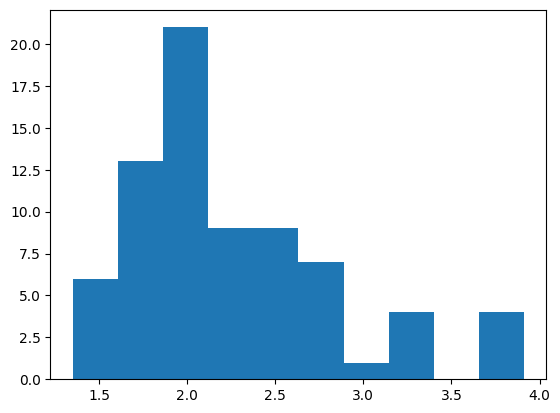

In [ ]:
plt.hist(genes.max())

**Figure 1:** Histogram of the maximum values in the genes dataset.

(array([ 2.,  5.,  6., 14., 17.,  8., 10.,  7.,  3.,  2.]),
 array([-3.86023201, -3.63056373, -3.40089544, -3.17122716, -2.94155887,
        -2.71189059, -2.4822223 , -2.25255401, -2.02288573, -1.79321744,
        -1.56354916]),
 <BarContainer object of 10 artists>)

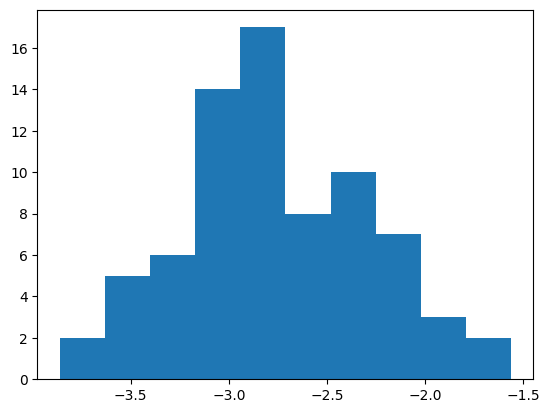

In [ ]:
plt.hist(genes.min())

**Figure 2:** Histogram of the minimum values in the genes dataset.

make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [ ]:
genes.shape

(4224, 74)

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

<Axes: >

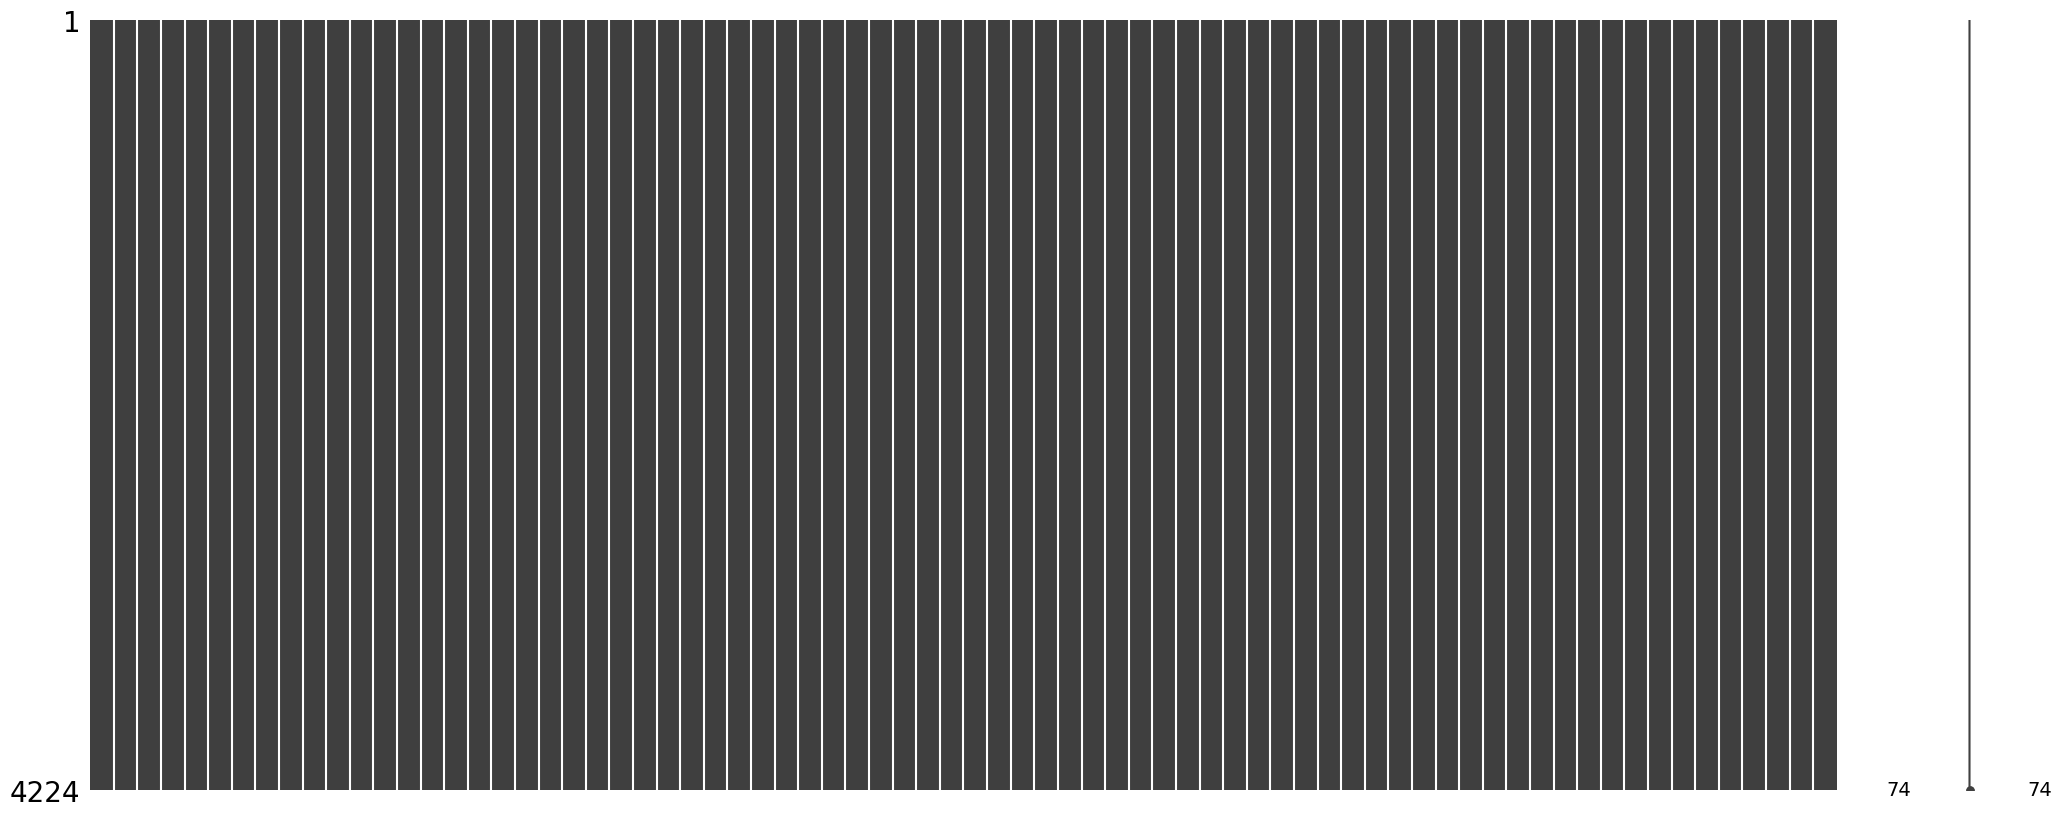

In [ ]:
import missingno as msno
msno.matrix(genes)

**Figure 3:** This plot visualizes the Nullity of the genes data frame as a matrix, we appear to be chillin with no missing data!

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

It seems unlikely that the expression of genes is not correlated, so that means whitening is out. The histograms plotted earlier reveal a pretty big difference (2.5x) between the largest max values and the smallest max values (same for the min values) so it seems as though it might be useful to standardize the expressions to mean 0 and stdev 1. I also know I want to use k-means and a quick look in the liturature seems to reveal that many people do standardization when working with gene expression and k-means. In short, we shall standardize.

In [ ]:
mean = genes.mean()
std = genes.std()

scaledgenes = (genes - mean) / std

In [ ]:

scaledgenes.mean(0).round(2), scaledgenes.std(0)

(1     0.0
 2    -0.0
 3     0.0
 4     0.0
 5    -0.0
      ... 
 83   -0.0
 84    0.0
 85    0.0
 86    0.0
 87    0.0
 Length: 74, dtype: float64,
 1     1.0
 2     1.0
 3     1.0
 4     1.0
 5     1.0
      ... 
 83    1.0
 84    1.0
 85    1.0
 86    1.0
 87    1.0
 Length: 74, dtype: float64)

## Tada! ✨Standardization Complete✨

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

We know we are hunting for 3 different clusters of cell types, so we need to tune perplexity and early exageration until 3 groups start to emerge

In [ ]:
from sklearn.manifold import TSNE

#decimated = scaledgenes.T.sample(frac=0.05).T

embedded = TSNE(n_components=2, perplexity=15, early_exaggeration=30).fit_transform(scaledgenes)


Text(0.5, 1.0, 't-SNE projection of the data')

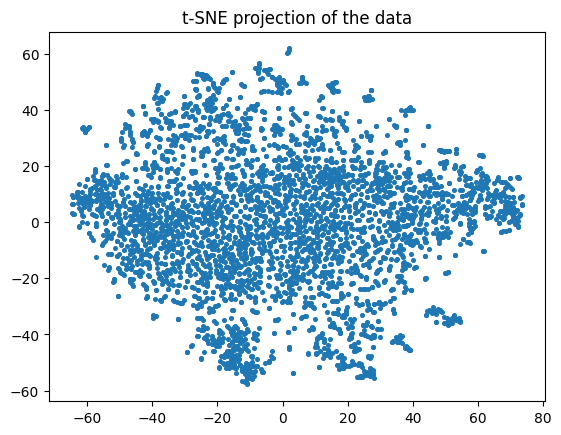

In [ ]:
plt.scatter(embedded[:,0], embedded[:,1], s=7)
plt.title("t-SNE projection of the data")

**Figure 4:** This is a scatterplot of the projected data using TSNE, Im lost in a sea of perplexity and early exaggeration and can't get it to form any distinct clusters :(

The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

In [ ]:
embedded.shape

(4224, 2)

## III-b calculate and plot the UMAP 2D projection

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


Text(0.5, 1.0, 'UMAP projection of the data')

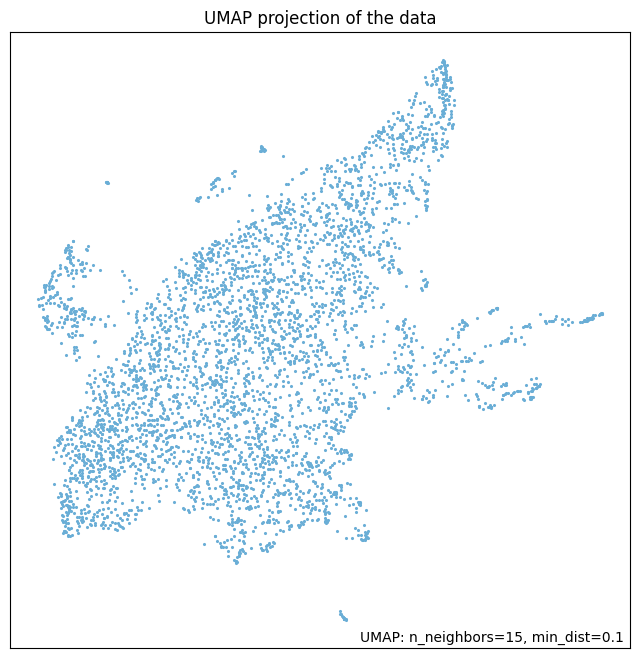

In [ ]:
mapper = umap.UMAP().fit(scaledgenes)
umap.plot.points(mapper)
# Umap uses matplotlib under the hood so this is how you add a title:
plt.title("UMAP projection of the data")

**Figure 5:** Scatter plot of the UMAP projections, Maybe some clusters begin to pop out here? Perhaps one on the bottom left, one in the center, and one on the right

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [ ]:
def calICVar(X, labels):
    unique_labels = np.unique(labels)
    icvar = 0
    for label in unique_labels:
        cluster_points = X[labels == label]
        cluster_mean = np.mean(cluster_points, axis=0)
        diffs = np.sum((cluster_points - cluster_mean) ** 2, axis=None)
        variance = np.sum(diffs)
        icvar += variance
        #print(variance)
    return icvar


cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

In [ ]:
from sklearn.cluster import KMeans

num_clust = range(1,11)
vars = [] #list of intracluster variance values for KMeans being run with 1->10 clusters

for k in num_clust:
  kmeans = KMeans(n_clusters=k).fit(scaledgenes)
  labels = kmeans.labels_
  icvar = calICVar(scaledgenes, labels)
  vars.append(icvar)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

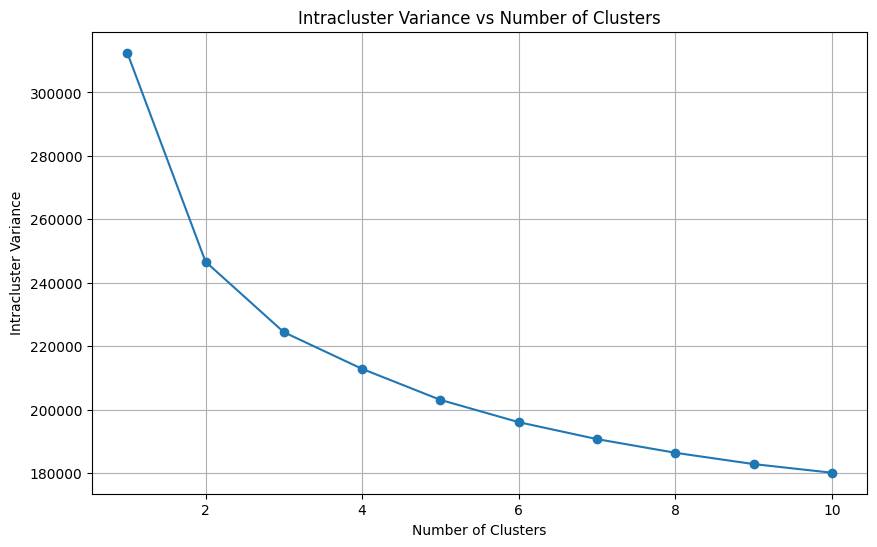

In [ ]:
# elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_clust, vars, marker='o')
plt.title('Intracluster Variance vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Intracluster Variance')
plt.grid(True)
plt.show()

**Figure 6:** To me it seems the cluster variance halves going from 1 to 2 clusters and then halves again going from 2 to 3 clusters and then flattens out after that. This suggests to me that the most prominent knee in the data is at 3 clusters and that this would be the number to go for. This is also backed up by the fact that we are looking for 3 different cell types so 3 clusters would make sense.

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [ ]:
geneclustersKM = KMeans(n_clusters=3).fit(scaledgenes)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

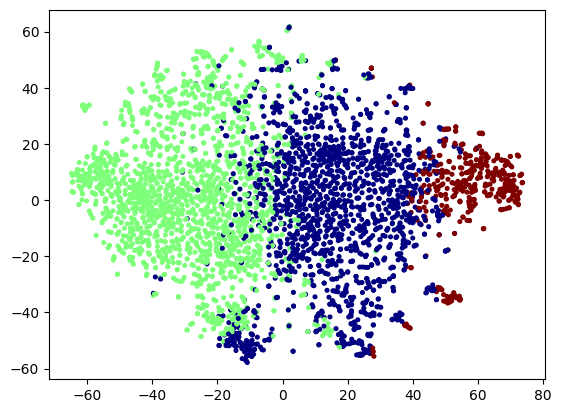

In [ ]:
labels = geneclustersKM.labels_
plt.scatter(embedded[:,0], embedded[:,1], s=7, c=labels, cmap='jet')

**Figure 7:** Here we see the tSNE embedding from earlier with the clusters applied based on kmeans clustering with k=3. Colors are applied according to cluster label to visually distinguish clusters. It is clear that the data fits well into three clusters that are relatively localized with good intra cluster compactness. Seems pretty gucci.

<Axes: >

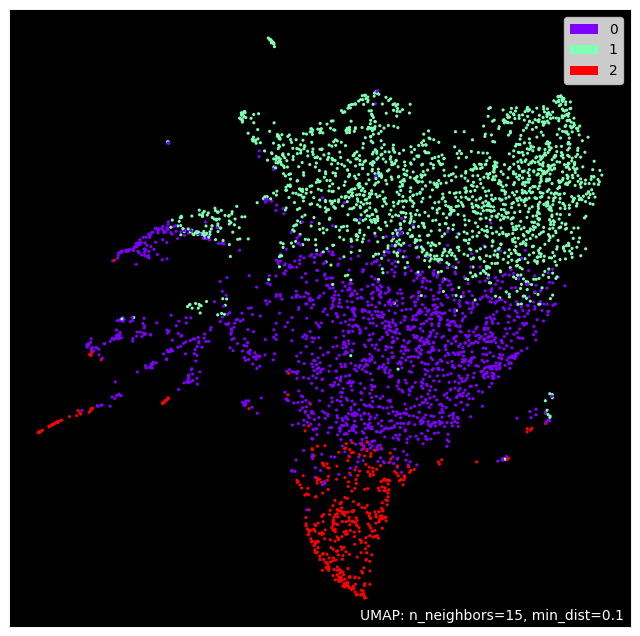

In [ ]:
umap.plot.points(mapper, labels=labels, theme='fire')

**Figure 8:** This one seems to not fare so well, there are some good chunks where clusters are tight, however there is also some very odd spreading of green really far away. This appears to be a hyper parameter issue and could use some tuning.

In other news, it Looks to me like a map of the US with California and Texas chopped off 👍

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [ ]:
dists = sp.spatial.distance.pdist(scaledgenes)
dists

array([4.53441453, 6.45152698, 8.01076677, ..., 9.03154041, 8.97517221,
       9.17532631])

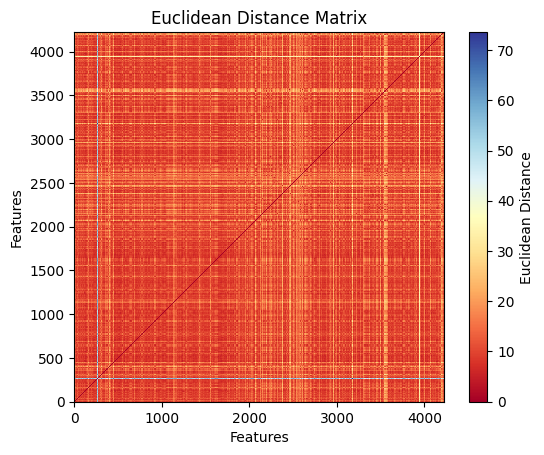

In [ ]:
# Taken from class:
dists_matrix = sp.spatial.distance.squareform(dists)

# Now plot this heatmap:
plt.imshow(dists_matrix, cmap="RdYlBu", origin="lower", interpolation='none')
plt.colorbar(label='Euclidean Distance')
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Euclidean Distance Matrix")

plt.show()


**Figure 9:** Heatmap of the Euclidean distance Matrix between the normalized dataset. Everything looks good except for the blue vertical line on the left side of the heatmap which I believe represents heavy outliers in the data.

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

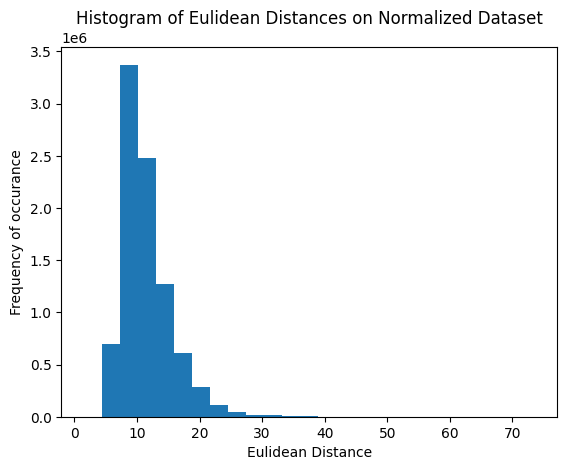

In [ ]:
plt.hist(dists, bins=25)
plt.xlabel('Eulidean Distance')
plt.ylabel('Frequency of occurance')
plt.title('Histogram of Eulidean Distances on Normalized Dataset')

plt.show()

**Figure 10:** A histogram of the Eulidean Distances on the normalized dataset. It apears to be centered around ~10-11. The X scale is very messed up because of those heavy outliers that were seen in the heatmap above, which will definitely skew the mean a little bit when calculating an initial epsilon.

In [ ]:
# Calculating initial Epsilon value by just taking the mean of the data from the
#   the histogram above, since it should be lower than this value, and the data
#   is being skewed by outliers, I'm going to try subtracting 2.

init_ep = np.mean(dists) - 2
print(f'The initial value for epsilon is {init_ep:0.3f}')

The initial value for epsilon is 9.470


## V-b Rub DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

In [ ]:
geneclustersDBS = skl.cluster.DBSCAN(eps=init_ep, min_samples=6).fit(scaledgenes)

np.unique(geneclustersDBS.labels_)

array([-1,  0,  1])

In [ ]:
cluster_number = np.unique(geneclustersDBS.labels_[geneclustersDBS.labels_ != -1])
outliers = geneclustersDBS.labels_[geneclustersDBS.labels_ == -1]
print(f"Outliers: {len(outliers)}")
print(f"Clusters: {len(cluster_number)}")

Outliers: 57
Clusters: 2


## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

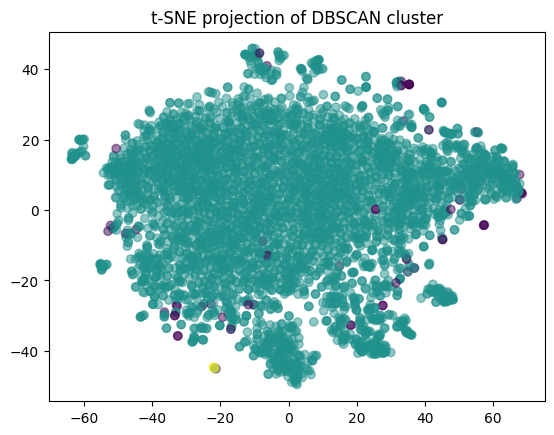

In [ ]:
# Init the TSNE
tsne = TSNE()
tsne_2d = tsne.fit_transform(scaledgenes)

plt.scatter(tsne_2d[:,0], tsne_2d[:,1], c=geneclustersDBS.labels_, cmap='viridis', alpha = 0.5)
plt.title('t-SNE projection of DBSCAN cluster')

plt.show()

**Figure 11:** By messing around with the initial epsilon (dividing by 2, subtracting 1-5 from it) I was able to get to to produce 2 clusters, but could not get out 3 clusters without having >1000 outliers, which was cuased by lowering epsilon by too much. I also played around with changing the min_samples hyperparameter to tune this to 2 clusters instead of just 1 with a few outliers.

In [ ]:
tsne_2d.shape

(4224, 2)

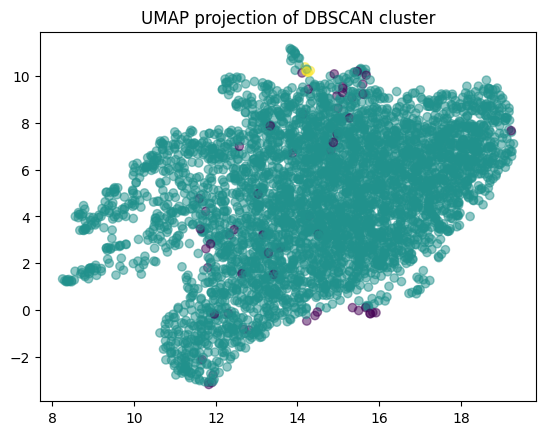

In [ ]:
umap_2d = umap.UMAP(min_dist=0.5).fit_transform(scaledgenes)

plt.scatter(umap_2d[:, 0], umap_2d[:, 1], c=geneclustersDBS.labels_, cmap='viridis', alpha = 0.5)
plt.title('UMAP projection of DBSCAN cluster')

plt.show()

**Figure 12:** UMAP projection of the DBSCAN

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

In [ ]:
clusteringAg = skl.cluster.AgglomerativeClustering(affinity = 'euclidean').fit(scaledgenes)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


choose ward linkage and plot the dendrogram of the clusters

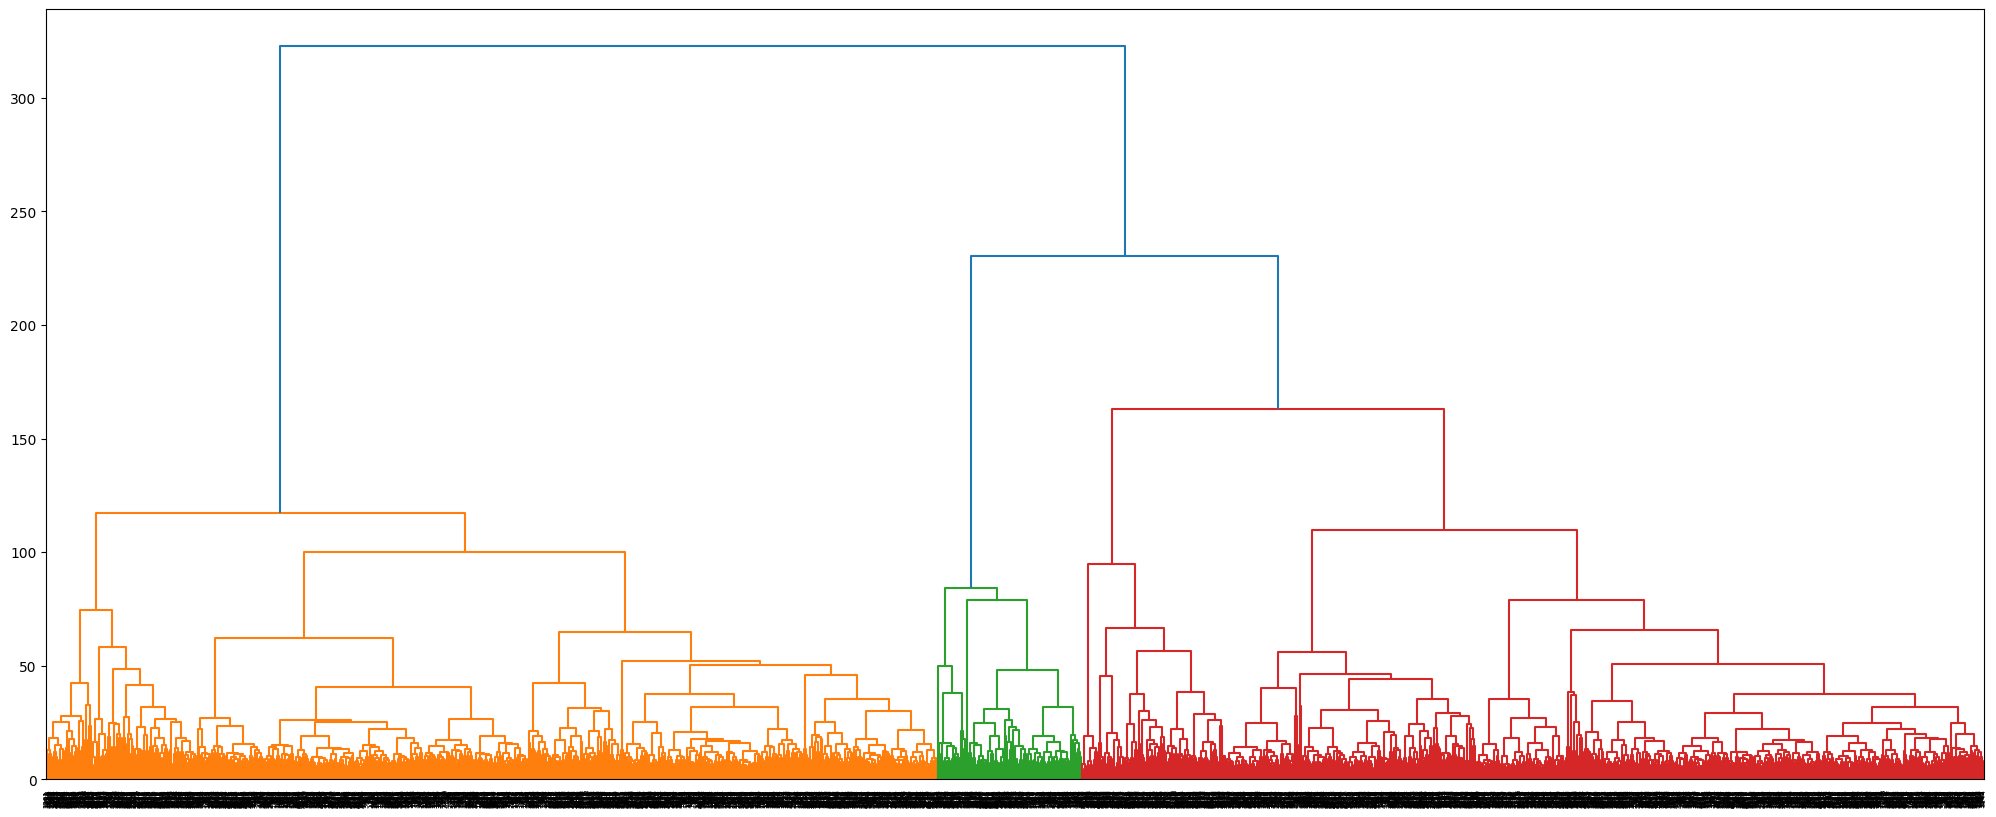

In [ ]:
Z = linkage(scaledgenes, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

**Figure 13:** This is the Dendogram of the dataset using a Ward Linkage between the data. As you can see it formed 3 main clusters at the bottom that were highly linked together, represending but the small vertical distance between the merging of smaller clusters. Another thing of notice is the green and red clusters seem to be more related than the orange dataset, which seems rather cinfident in its dissimilarity using this linking method.

repeat with a different linkage and comment on differences

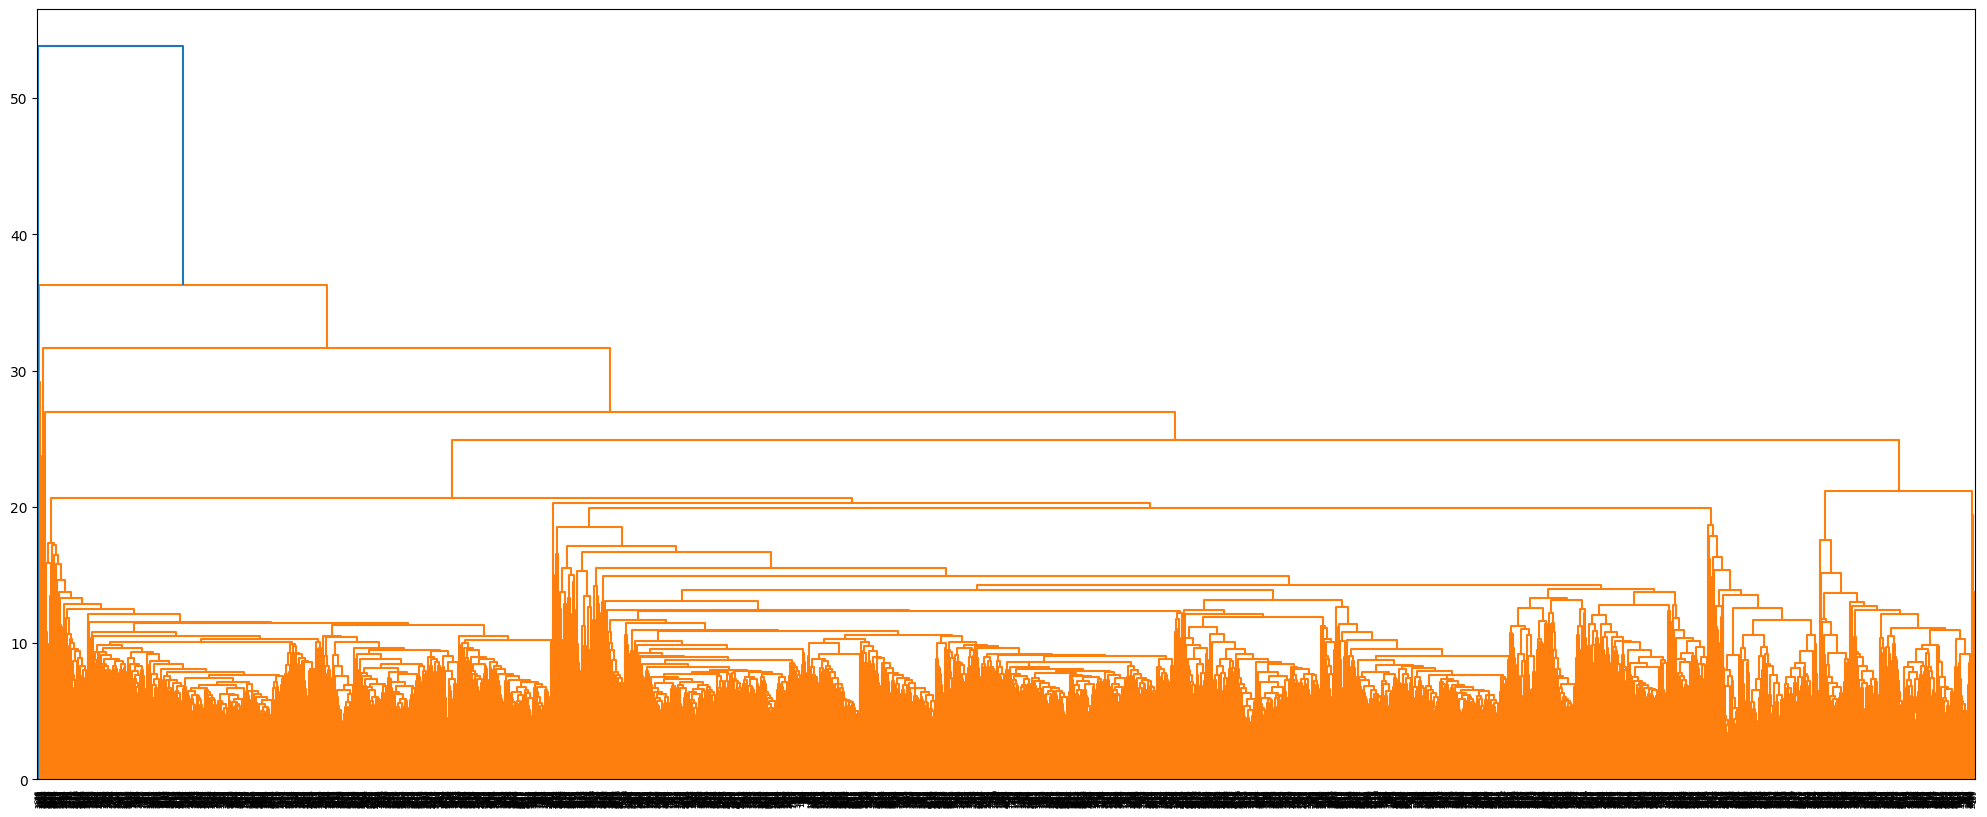

In [ ]:
Z = linkage(scaledgenes, 'weighted')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

**Figure 14:** This is the Dendogram of the dataset using the weighted linkage between the data. It only was able to find a single cluster that seems fairly connected instead of the 3 with the Ward linkage. This makes sense because of the way the weighted linkage works, which gives higher weights based on the size of the clusters. My guess as to what happened was that the red and green clusters shown from the ward linkage dendogram marged, then because of this increased size it got a higher weight then merged with the original orange data.

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



In [ ]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=3, affinity = 'euclidean').fit(scaledgenes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

## VI-c plot the 2D TSNE projection colorcoded as before

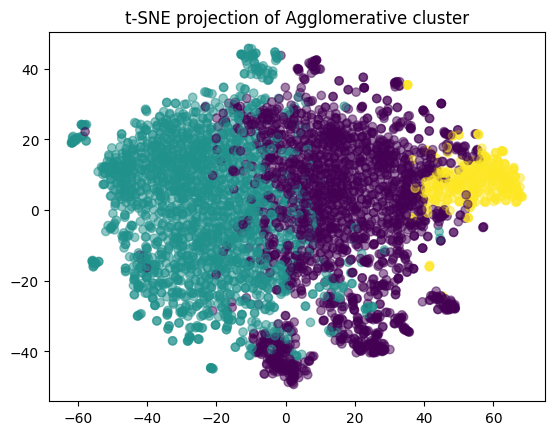

In [ ]:
# Init the TSNE
tsne = TSNE()
tsne_2d = tsne.fit_transform(scaledgenes)

plt.scatter(tsne_2d[:,0], tsne_2d[:,1], c=geneclustersAg.labels_, cmap='viridis', alpha = 0.5)
plt.title('t-SNE projection of Agglomerative cluster')

plt.show()

**Figure 15:** As you can see the agglomerative clustering is very similar to the results we got from K-means.

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering

I think that the most 'useful' method of clustering is Hierarchical clustering because you not only get to see the final result of the clustering method, but you also get an entire history of how the clusters formed, and their relationship between each other. The downside of this method is the computational cost, but I think for visualization, clarity, and debugging purposes it gives the richest and least ambiguous information when plotted, making it the most 'useful' method to me.